# Develop a Chatbot Using Python, NLTK, and TensorFlow

In [1]:
# Run this cell so you do not see GPU availibility errors from tensorflow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# Task 1: Import the Required Libraries

In [2]:
import json as js
import pickle as pkl 
import random
import nltk 
from nltk.stem import WordNetLemmatizer 
import numpy  
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense,Activation,Dropout
import matplotlib.pyplot as plt
from matplotlib import rcParams


# Task 2: Load the Data

In [3]:
nltk.download('omw-1.4')
with open("intents.json", encoding="UTF8") as json_file:
    intents = js.load(json_file)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [4]:
print(intents)

{'intents': [{'tag': 'greeting', 'patterns': ['Hi there', 'How are you', 'Is anyone there?', 'Hey', 'Hola', 'Hello', 'Good day'], 'responses': ['Hello, thanks for asking', 'Good to see you again', 'Hi there, how can I help?'], 'context': ['']}, {'tag': 'goodbye', 'patterns': ['Bye', 'See you later', 'Goodbye', 'Nice chatting to you, bye', 'Till next time'], 'responses': ['See you!', 'Have a nice day', 'Bye! Come back again soon.'], 'context': ['']}, {'tag': 'thanks', 'patterns': ['Thanks', 'Thank you', "That's helpful", 'Awesome, thanks', 'Thanks for helping me'], 'responses': ['Happy to help!', 'Any time!', 'My pleasure'], 'context': ['']}, {'tag': 'noanswer', 'patterns': [], 'responses': ["Sorry, can't understand you", 'Please give me more info', 'Not sure I understand'], 'context': ['']}, {'tag': 'options', 'patterns': ['How you could help me?', 'What you can do?', 'What help you provide?', 'How you can be helpful?', 'What support is offered'], 'responses': ['I can guide you through

# Task 3: Tokenization

In [5]:
words = []
classes = []
documents = []


for intent in intents['intents']:
    for pattern in intent['patterns']:
        w= nltk.word_tokenize(pattern)
        words.extend(w)
        classes.append(intent['tag'])
        documents.append((w, intent['tag']))

        

In [6]:
print("----the intents-----")
print(intent)
print("----the patterns-----")
print(pattern)
print("----the w-----")  
print(w)
print("----the words-----") 
print(words)
print("----the classes-----") 
print(classes)
print("----the documents-----") 
print(documents)

----the intents-----
{'tag': 'search_hospital_by_type', 'patterns': [], 'responses': ['Loading hospital details'], 'context': ['']}
----the patterns-----
Looking up hospital details
----the w-----
['Looking', 'up', 'hospital', 'details']
----the words-----
['Hi', 'there', 'How', 'are', 'you', 'Is', 'anyone', 'there', '?', 'Hey', 'Hola', 'Hello', 'Good', 'day', 'Bye', 'See', 'you', 'later', 'Goodbye', 'Nice', 'chatting', 'to', 'you', ',', 'bye', 'Till', 'next', 'time', 'Thanks', 'Thank', 'you', 'That', "'s", 'helpful', 'Awesome', ',', 'thanks', 'Thanks', 'for', 'helping', 'me', 'How', 'you', 'could', 'help', 'me', '?', 'What', 'you', 'can', 'do', '?', 'What', 'help', 'you', 'provide', '?', 'How', 'you', 'can', 'be', 'helpful', '?', 'What', 'support', 'is', 'offered', 'How', 'to', 'check', 'Adverse', 'drug', 'reaction', '?', 'Open', 'adverse', 'drugs', 'module', 'Give', 'me', 'a', 'list', 'of', 'drugs', 'causing', 'adverse', 'behavior', 'List', 'all', 'drugs', 'suitable', 'for', 'patient

# Task 4: Lemmatization

In [7]:
lemmatizer = WordNetLemmatizer()

ignore_words = ['?', '!']

words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]

In [8]:
print(words) 

['hi', 'there', 'how', 'are', 'you', 'is', 'anyone', 'there', 'hey', 'hola', 'hello', 'good', 'day', 'bye', 'see', 'you', 'later', 'goodbye', 'nice', 'chatting', 'to', 'you', ',', 'bye', 'till', 'next', 'time', 'thanks', 'thank', 'you', 'that', "'s", 'helpful', 'awesome', ',', 'thanks', 'thanks', 'for', 'helping', 'me', 'how', 'you', 'could', 'help', 'me', 'what', 'you', 'can', 'do', 'what', 'help', 'you', 'provide', 'how', 'you', 'can', 'be', 'helpful', 'what', 'support', 'is', 'offered', 'how', 'to', 'check', 'adverse', 'drug', 'reaction', 'open', 'adverse', 'drug', 'module', 'give', 'me', 'a', 'list', 'of', 'drug', 'causing', 'adverse', 'behavior', 'list', 'all', 'drug', 'suitable', 'for', 'patient', 'with', 'adverse', 'reaction', 'which', 'drug', 'dont', 'have', 'adverse', 'reaction', 'open', 'blood', 'pressure', 'module', 'task', 'related', 'to', 'blood', 'pressure', 'blood', 'pressure', 'data', 'entry', 'i', 'want', 'to', 'log', 'blood', 'pressure', 'result', 'blood', 'pressure',

# Task 5: Create Data for Training

In [9]:
training = []
output_empty = [0] * len(classes)
import numpy as np 

for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) 
    for word in pattern_words]
    for w in words:
        if w in pattern_words:
            bag.append(1)
        else: bag.append(0)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])


random.shuffle(training)
a = int(0.7*len(training))
training = np.array(training, dtype = 'object')
X_train = list(training[:a, 0])
y_train = list(training[:a, 1])
X_val = list(training[a:, 0])
y_val = list(training[a:, 1])

# Task 6: Design the Model

In [10]:
model = Sequential()
model.add(Dense(128, input_shape=(len(X_train[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y_train[0]), activation='softmax')) 

# Task 7: Train and Save the Model

In [11]:
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

hist = model.fit(np.array(X_train),
                 np.array(y_train),
                 epochs=200,
                 batch_size=5, validation_data=(X_val, y_val),
                 verbose=1)

model.save('trained_model.h5', hist)

Epoch 1/200
7/7 [==============================] - 2s 161ms/step - loss: 3.7780 - accuracy: 0.0625 - val_loss: 3.7446 - val_accuracy: 0.2000
Epoch 2/200
7/7 [==============================] - 0s 14ms/step - loss: 3.6173 - accuracy: 0.1875 - val_loss: 3.4746 - val_accuracy: 0.2000
Epoch 3/200
7/7 [==============================] - 0s 13ms/step - loss: 3.1625 - accuracy: 0.1562 - val_loss: 3.0431 - val_accuracy: 0.2667
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 2.7326 - accuracy: 0.3438 - val_loss: 2.6840 - val_accuracy: 0.2667
Epoch 5/200
7/7 [==============================] - 0s 13ms/step - loss: 2.2667 - accuracy: 0.3750 - val_loss: 2.4092 - val_accuracy: 0.2000
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 2.3867 - accuracy: 0.3750 - val_loss: 2.1086 - val_accuracy: 0.4000
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 1.8684 - accuracy: 0.4062 - val_loss: 2.1206 - val_accuracy: 0.4000
Epoch 8/200
7/7 [==

# Task 8: Print the training curves

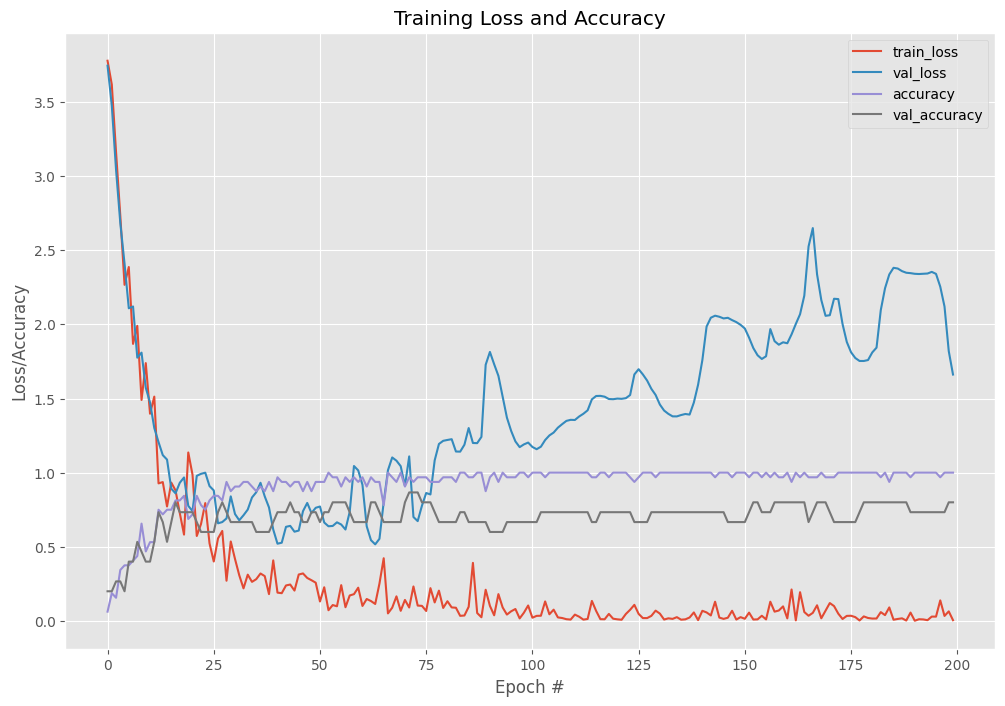

In [12]:
plt.rcParams["figure.figsize"] = (12,8)
N = np.arange(0, 200)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, hist.history["loss"], label="train_loss")
plt.plot(N, hist.history["val_loss"], label="val_loss")
plt.plot(N, hist.history['accuracy'], label="accuracy")
plt.plot(N, hist.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()